In [20]:
"""
    load_data.ipynb
    Author: Anuvrat, Deepak, Noah
    Date: 24th July 2024
    Purpose: Load input files for further processing

    Github ticket: NA
"""

'\n    load_data.ipynb\n    Author: Anuvrat Chaturvedi\n    Date: 24th July 2024\n    Purpose: Load input files for further processing\n\n    Github ticket: [#9](https://github.com/anuvrat-umich/siads_milestone2/issues/9)\n'

### Load Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Define common variables
brfss2022_sas_file = '../../LLCP2022.XPT'
brfss2022_sas_file_pkl='../data/BRFSS2022_raw.pkl'

In [66]:
# Display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Load BRFSS 2022 file

In [10]:
df_BRFSS2022_raw=pd.read_sas(brfss2022_sas_file, format='xport', encoding='utf-8')
#brfss2022_sas_file_pkl=pd.read_pickle(brfss2022_sas_file_pkl)

C:\Users\Anuvrat\AppData\Local\Temp\ipykernel_35560\1410207275.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_BRFSS2022_raw=pd.read_sas(brfss2022_sas_file, format='xport', encoding='utf-8')
C:\Users\Anuvrat\AppData\Local\Temp\ipykernel_35560\1410207275.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_BRFSS2022_raw=pd.read_sas(brfss2022_sas_file, format='xport', encoding='utf-8')
C:\Users\Anuvrat\AppData\Local\Temp\ipykernel_35560\1410207275.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

In [13]:
df_BRFSS2022_raw.tail()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
445127,78.0,11.0,12192022,12,19,2022,1100.0,2022001527,2.022002e+09,NaN,...,4.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,1.0
445128,78.0,11.0,12212022,12,21,2022,1100.0,2022001528,2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0
445129,78.0,11.0,11292022,11,29,2022,1100.0,2022001529,2.022002e+09,NaN,...,1.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,2.0,2.0,2.0
445130,78.0,11.0,12082022,12,08,2022,1100.0,2022001530,2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0
445131,78.0,11.0,12142022,12,14,2022,1100.0,2022001531,2.022002e+09,NaN,...,3.0,NaN,1.0,5.000000e+01,2.0,9.990000e+04,9.0,NaN,NaN,2.0


In [12]:
# Save the raw data to a pickle file
df_BRFSS2022_raw.to_pickle(brfss2022_sas_file_pkl)

In [5]:
# Load the pickle file
df_BRFSS2022_raw= pd.read_pickle(brfss2022_sas_file_pkl)

In [18]:
len(df_BRFSS2022_raw.columns)

328

##### Exploring various columns

In [52]:
potential_features_Xy=['_STATE', 'DISPCODE', 'PVTRESD1', 'COLGHOUS', 'NUMADULT', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 'SEXVAR',
                  'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1',
                    'EXERANY2', 'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1',
                    'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA',
                    'RENTHOM1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF',
                    'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2',
                    'USENOW3', 'ECIGNOW2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS',
                    'COVIDPOS', 'COVIDSMP', 'PREDIAB2', 'DIABTYPE', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'COPDSMOK', 'CNCRDIFF',
                    'CNCRAGE', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS',
                    'SDHTRNSP', 'SDHSTRE1', 'BIRTHSEX', 'RRCLASS3', 'QSTLANG', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RFHLTH',
                    '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_EXTETH3', '_ALTETH3', '_MICHD', '_LTASTH1',
                    '_CASTHM1', '_ASTHMS1', '_DRDXAR2', '_PRACE2', '_MRACE2', '_HISPANC', '_RACE1', '_RACEG22', '_RACEGR4',
                    '_RACEPR1', '_SEX', '_AGEG5YR', '_AGE80', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_RFBMI5', '_CHLDCNT', '_EDUCAG',
                    '_INCOMG1', '_SMOKER3', '_YRSSMOK', '_PACKDAY', '_PACKYRS', '_YRSQUIT', '_SMOKGRP', '_RFBING6', '_DRNKWK2',
                    '_RFDRHV8']

In [49]:
df_BRFSS2022_raw[potential_features_Xy].sample(10)

,_STATE,DISPCODE,PVTRESD1,COLGHOUS,NUMADULT,CADULT1,PVTRESD3,CCLGHOUS,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGNOW2,LCSFIRST,LCSLAST,LCSNUMCG,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,COVIDPOS,COVIDSMP,PREDIAB2,DIABTYPE,TOLDCFS,HAVECFS,WORKCFS,COPDSMOK,CNCRDIFF,CNCRAGE,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,BIRTHSEX,RRCLASS3,QSTLANG,_METSTAT,_URBSTAT,_IMPRACE,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE80,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_RFBING6,_DRNKWK2,_RFDRHV8
308600,41.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,2.0,88.0,88.0,NaN,3.0,1.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,9.0,5.0,3.0,2.0,7.0,88.0,1.0,NaN,100.0,503.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,NaN,NaN,3.0,1.0,20.0,55.0,20.0,888.0,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,9.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,12.0,78.0,160.0,4536.0,1771.0,1.0,1.0,1.0,3.0,1.0,3.0,35.0,1.00,35.0,23.0,3.0,1.0,5.397605e-79,1.0
186564,26.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,5.0,30.0,88.0,25.0,99.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,3.0,NaN,3.0,4.0,3.0,2.0,8.0,88.0,2.0,NaN,231.0,504.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,NaN,NaN,3.0,1.0,14.0,42.0,20.0,888.0,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,2.0,3.0,1.0,9.0,9.0,2.0,1.0,NaN,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0,60.0,163.0,10478.0,3965.0,4.0,2.0,1.0,2.0,1.0,3.0,28.0,1.00,28.0,18.0,3.0,1.0,5.397605e-79,1.0
386269,51.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,1.0,88.0,88.0,NaN,7.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,1.0,6.0,1.0,1.0,1.0,88.0,10.0,NaN,135.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,107.0,1.0,88.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,11.0,70.0,163.0,6123.0,2317.0,2.0,1.0,1.0,4.0,6.0,4.0,NaN,NaN,NaN,NaN,4.0,1.0,7.000000e+02,1.0
427862,55.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,3.0,4.0,30.0,88.0,10.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,34.0,5.0,6.0,2.0,2.0,1.0,2.0,6.0,1.0,280.0,411.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,201.0,77.0,88.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,43.0,150.0,12701.0,NaN,NaN,9.0,3.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,4.0,1.0,9.990000e+04,9.0
305157,40.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,5.0,77.0,15.0,88.0,7.0,2.0,2.0,2.0,1.0,6.0,2.0,7.0,1.0,1.0,1.0,2.0,1.0,7.0,1.0,2.0,1.0,3.0,NaN,2.0,4.0,1.0,1.0,3.0,88.0,5.0,NaN,180.0,507.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,3.0,3.0,16.0,NaN,20.0,230.0,5.0,77.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,9.0,3.0,1.0,1.0,1.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,8.0,57.0,170.0,8165.0,2819.0,3.0,2.0,1.0,2.0,3.0,1.0,41.0,1.00,41.0,NaN,1.0,9.0,3.500000e+03,2.0
285655,39.0,1100.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,NaN,1.0,5.0,1.0,2

In [53]:
df_Xy_potential=df_BRFSS2022_raw[potential_features_Xy]

In [54]:
missing_values=pd.DataFrame({'missing':df_Xy_potential.isna().sum(), 
                             'per_missing':df_Xy_potential.isna().sum()/df_Xy_potential.shape[0]}).reset_index()

missing_values.to_csv('../data/missing_values.csv', index=False)

In [444]:
selected_features_Xy=['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'SLEPTIM1', 
                        'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'MARITAL', 
                        'EDUCA', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'DECIDE', 'DIFFALON', 'SMOKE100', 
                        'COVIDPOS', 'PREDIAB2', 'CNCRDIFF', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 
                        'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'SDHSTRE1', 'QSTLANG', '_METSTAT', '_URBSTAT', 
                        '_HLTHPLN', '_TOTINDA', '_ASTHMS1', '_DRDXAR2', '_RACEPR1', 
                        '_SEX', '_AGE80', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_SMOKER3', '_YRSSMOK', '_SMOKGRP', '_RFBING6', '_DRNKWK2', '_RFDRHV8']

dropped_feature_Xy_secondcut=['PRIMINSR', 'EXERANY2', 'LCSFIRST', 'LCSLAST', '_RFHLTH', '_PHYS14D', '_MENT14D', '_RFBMI5', '_CHLDCNT', '_EDUCAG']

In [445]:
# Checking for all heart related diseases
#df_Xy_heart = df_Xy_potential[['CVDCRHD4', 'CVDINFR4', 'CVDSTRK3']]
#df_Xy_heart=df_Xy_heart[(df_Xy_heart.CVDCRHD4==1) | (df_Xy_heart.CVDINFR4==1) | (df_Xy_heart.CVDSTRK3==1)]
#df_Xy_heart.value_counts()

In [446]:
# Selecting only those records which have presence or absence information for heart related diseases (Heart Attack)
df_Xy_selected=df_Xy_potential[selected_features_Xy]
df_Xy_selected=df_Xy_selected[df_Xy_selected['CVDINFR4'].isin([1, 2])] #CVDCRHD4, CVDSTRK3

In [447]:
df_Xy_potential.shape, df_Xy_selected.shape

((445132, 122), (442067, 58))

#### Treatment of missing and other coded values (77, 88, 99, 9, etc.)

In [448]:
# Setting 88 to 0 and calculating the means
df_Xy_selected.PHYSHLTH=np.where(df_Xy_selected.PHYSHLTH.isin([88]), 0, df_Xy_selected.PHYSHLTH)
mean_PHYSHLTH=df_Xy_selected[~((df_Xy_selected.PHYSHLTH.isna()) | (df_Xy_selected.PHYSHLTH.isin([77, 99])))]['PHYSHLTH'].mean()
df_Xy_selected.MENTHLTH=np.where(df_Xy_selected.MENTHLTH.isin([88]), 0, df_Xy_selected.MENTHLTH)
mean_MENTHLTH=df_Xy_selected[~((df_Xy_selected.MENTHLTH.isna()) | (df_Xy_selected.MENTHLTH.isin([77, 99])))]['MENTHLTH'].mean()

In [449]:
mean_MENTHLTH

4.371406150827996

In [451]:
# Treatment of missing values
df_Xy_selected.PHYSHLTH=np.where(df_Xy_selected.PHYSHLTH.isin([77, 99]), mean_PHYSHLTH, df_Xy_selected.PHYSHLTH) # 88 = None, 77 = Don't know/Not sure, 99 = Refused
df_Xy_selected.MENTHLTH=np.where(df_Xy_selected.MENTHLTH.isin([77, 99]), mean_MENTHLTH, df_Xy_selected.MENTHLTH) # 88 = None, 77 = Don't know/Not sure, 99 = Refused
df_Xy_selected.CHILDREN=np.where(((df_Xy_selected.CHILDREN.isna()) | (df_Xy_selected.CHILDREN.isin([88, 99]))), 0, df_Xy_selected.CHILDREN) # 88 = None, 99 = Refused
df_Xy_selected.INCOME3=np.where(((df_Xy_selected.INCOME3.isna()) | (df_Xy_selected.INCOME3.isin([77, 99]))), 6, df_Xy_selected.INCOME3) # 77 = Don't know/Not sure, 99 = Refused
df_Xy_selected.DECIDE=np.where(((df_Xy_selected.DECIDE.isna()) | (df_Xy_selected.DECIDE.isin([7, 9]))), 2, df_Xy_selected.DECIDE) # 7 = Don't know/Not sure, 9 = Refused
df_Xy_selected.DIFFALON=np.where(((df_Xy_selected.DIFFALON.isna()) | (df_Xy_selected.DIFFALON.isin([7, 9]))), 2, df_Xy_selected.DIFFALON) # 7 = Don't know/Not sure, 9 = Refused
df_Xy_selected.PREDIAB2=np.where(((df_Xy_selected.PREDIAB2.isna()) | (df_Xy_selected.PREDIAB2.isin([7, 9]))), 3, df_Xy_selected.PREDIAB2) # 7 = Don't know/Not sure, 9 = Refused
df_Xy_selected.CNCRDIFF=np.where(((df_Xy_selected.CNCRDIFF.isna()) | (df_Xy_selected.CNCRDIFF.isin([7, 9]))), 0, df_Xy_selected.CNCRDIFF) # 7 = Don't know/Not sure, 9 = Refused
df_Xy_selected._HLTHPLN=np.where(((df_Xy_selected._HLTHPLN.isin([9]))), 1, df_Xy_selected._HLTHPLN) # 9 = Don´t know, refused or missing
df_Xy_selected._YRSSMOK=np.where(((df_Xy_selected._SMOKER3.isin([4]))), 0, df_Xy_selected._YRSSMOK) # Never smoked would have 0 smoking years. However, YRSSMOK and SDOH features are missing for the same records. There is potential for some bias here.


In [453]:
df_nona=df_Xy_selected[~(
    (df_Xy_selected._RFDRHV8.isin([9])) |
    (df_Xy_selected._DRNKWK2.isin([99900])) |
    (df_Xy_selected._RFBING6.isin([9])) |
    (df_Xy_selected._SMOKGRP.isna()) |
    (df_Xy_selected._YRSSMOK.isna()) |
    (df_Xy_selected._SMOKER3.isin([9])) |
    (df_Xy_selected._BMI5CAT.isna()) |
    (df_Xy_selected._BMI5.isna()) |
    (df_Xy_selected.WTKG3.isna()) |
    (df_Xy_selected.HTM4.isna()) |
    (df_Xy_selected._AGE80.isna()) |
    (df_Xy_selected._SEX.isna()) |
    (df_Xy_selected._RACEPR1.isna()) |
    (df_Xy_selected._DRDXAR2.isna()) |
    (df_Xy_selected._ASTHMS1.isin([9])) |
    (df_Xy_selected._TOTINDA.isin([9])) |
    (df_Xy_selected._HLTHPLN.isin([9])) |
    (df_Xy_selected._URBSTAT.isna()) |
    (df_Xy_selected._METSTAT.isna()) |
    (df_Xy_selected.QSTLANG.isna()) |
    (df_Xy_selected.SDHSTRE1.isna()) | (df_Xy_selected.SDHSTRE1.isin([7, 9])) |
    (df_Xy_selected.SDHTRNSP.isna()) | (df_Xy_selected.SDHTRNSP.isin([7, 9])) |
    (df_Xy_selected.SDHUTILS.isna()) | (df_Xy_selected.SDHUTILS.isin([7, 9])) |
    (df_Xy_selected.SDHBILLS.isna()) | (df_Xy_selected.SDHBILLS.isin([7, 9])) |
    (df_Xy_selected.SDHFOOD1.isna()) | (df_Xy_selected.SDHFOOD1.isin([7, 9])) |
    (df_Xy_selected.FOODSTMP.isna()) | (df_Xy_selected.FOODSTMP.isin([7, 9])) |
    (df_Xy_selected.SDHEMPLY.isna()) | (df_Xy_selected.SDHEMPLY.isin([7, 9])) |
    (df_Xy_selected.SDHISOLT.isna()) | (df_Xy_selected.SDHISOLT.isin([7, 9])) |
    (df_Xy_selected.EMTSUPRT.isna()) | (df_Xy_selected.EMTSUPRT.isin([7, 9])) |
    (df_Xy_selected.LSATISFY.isna()) | (df_Xy_selected.LSATISFY.isin([7, 9])) |
    (df_Xy_selected.CNCRDIFF.isna()) | (df_Xy_selected.CNCRDIFF.isin([7, 9])) |
    (df_Xy_selected.PREDIAB2.isna()) | (df_Xy_selected.PREDIAB2.isin([7, 9])) |
    (df_Xy_selected.COVIDPOS.isna()) | (df_Xy_selected.COVIDPOS.isin([7, 9])) |
    (df_Xy_selected.SMOKE100.isna()) | (df_Xy_selected.SMOKE100.isin([7, 9])) |
    (df_Xy_selected.DIFFALON.isna()) | (df_Xy_selected.DIFFALON.isin([7, 9])) |
    (df_Xy_selected.DECIDE.isna()) | (df_Xy_selected.DECIDE.isin([7, 9])) |
    (df_Xy_selected.INCOME3.isna()) | (df_Xy_selected.INCOME3.isin([77, 99])) |
    (df_Xy_selected.CHILDREN.isna()) | (df_Xy_selected.CHILDREN.isin([99])) |
    (df_Xy_selected.EMPLOY1.isna()) | (df_Xy_selected.EMPLOY1.isin([9])) |
    (df_Xy_selected.VETERAN3.isna()) | (df_Xy_selected.VETERAN3.isin([7, 9])) |
    (df_Xy_selected.RENTHOM1.isna()) | (df_Xy_selected.RENTHOM1.isin([7, 9])) |
    (df_Xy_selected.EDUCA.isna()) | (df_Xy_selected.EDUCA.isin([9])) |
    (df_Xy_selected.MARITAL.isna()) | (df_Xy_selected.MARITAL.isin([9])) |
    (df_Xy_selected.DIABETE4.isna()) | (df_Xy_selected.DIABETE4.isin([7, 9])) |
    (df_Xy_selected.CHCKDNY2.isna()) | (df_Xy_selected.CHCKDNY2.isin([7, 9])) |
    (df_Xy_selected.ADDEPEV3.isna()) | (df_Xy_selected.ADDEPEV3.isin([7, 9])) |
    (df_Xy_selected.CHCCOPD3.isna()) | (df_Xy_selected.CHCCOPD3.isin([7, 9])) |
    (df_Xy_selected.CHCOCNC1.isna()) | (df_Xy_selected.CHCOCNC1.isin([7, 9])) |
    (df_Xy_selected.CVDSTRK3.isna()) | (df_Xy_selected.CVDSTRK3.isin([7, 9])) |
    (df_Xy_selected.CVDCRHD4.isna()) | (df_Xy_selected.CVDCRHD4.isin([7, 9])) |
    (df_Xy_selected.CVDINFR4.isna()) | (df_Xy_selected.CVDINFR4.isin([7, 9])) |
    (df_Xy_selected.SLEPTIM1.isna()) | (df_Xy_selected.SLEPTIM1.isin([77, 99])) |
    (df_Xy_selected.CHECKUP1.isna()) | (df_Xy_selected.CHECKUP1.isin([7, 9])) |
    (df_Xy_selected.MEDCOST1.isna()) | (df_Xy_selected.MEDCOST1.isin([7, 9])) |
    (df_Xy_selected.PERSDOC3.isna()) | (df_Xy_selected.PERSDOC3.isin([7, 9])) |
    (df_Xy_selected.MENTHLTH.isna()) | (df_Xy_selected.MENTHLTH.isin([77, 99])) |
    (df_Xy_selected.PHYSHLTH.isna()) | (df_Xy_selected.PHYSHLTH.isin([77, 99])) |
    (df_Xy_selected.GENHLTH.isna()) | (df_Xy_selected.GENHLTH.isin([7, 9]))
                         )]
print (f"{df_Xy_selected.shape[0]-df_nona.shape[0]} rows dropped due to missing values. {df_nona.shape[0]} rows remaining.")

253162 rows dropped due to missing values. 188905 rows remaining.


Total records = 310,019 (is SDOH data is not included), 188,905 (if SDOH data is included without imputation). Records dropped solely due to SDOH data = 121,114.

In [455]:
display(df_nona.shape)
display(df_nona.CVDCRHD4.value_counts()/df_nona.shape[0])

(188905, 58)

2.0    0.938599
1.0    0.061401
Name: CVDCRHD4, dtype: float64

In [456]:
# Saving data without missing values
df_nona.to_pickle('../data/BRFSS2022_nona.pkl')

#### Feature Engineering

##### Feature engineering including below taken care of by Deepak in 'SIADS Capstone Data Analysis.ipynb'

##### File after feature engineering from Deepak

In [10]:
# File after feature engineering
BRFSS2022_nona_encoded=pd.read_pickle('../data/BRFSS2022_nona_encoded.pkl')

In [11]:
print(f"Total columns={len(BRFSS2022_nona_encoded.columns)}")
display(BRFSS2022_nona_encoded.columns)

Total columns=81


Index(['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1',
       'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'CHCOCNC1', 'CHCCOPD3',
       'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'EDUCA', 'VETERAN3', 'CHILDREN',
       'INCOME3', 'DECIDE', 'DIFFALON', 'SMOKE100', 'COVIDPOS', 'PREDIAB2',
       'CNCRDIFF', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP',
       'SDHFOOD1', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'SDHSTRE1', 'QSTLANG',
       '_METSTAT', '_URBSTAT', '_HLTHPLN', '_TOTINDA', '_DRDXAR2', '_SEX',
       '_AGE80', 'HTM4', 'WTKG3', '_BMI5', '_YRSSMOK', '_RFBING6', '_DRNKWK2',
       '_RFDRHV8', '_ASTHMS1_1.0', '_ASTHMS1_2.0', '_ASTHMS1_3.0',
       'RENTHOM1_1.0', 'RENTHOM1_2.0', 'RENTHOM1_3.0', '_BMI5CAT_1.0',
       '_BMI5CAT_2.0', '_BMI5CAT_3.0', '_BMI5CAT_4.0', '_RACEPR1_1.0',
       '_RACEPR1_2.0', '_RACEPR1_3.0', '_RACEPR1_4.0', '_RACEPR1_5.0',
       '_RACEPR1_6.0', '_RACEPR1_7.0', '_SMOKER3_1.0', '_SMOKER3_3.0',
       '_SMOKER3_4.0', '_SMOK

In [12]:
## Feature Engineering for binary features
def convert_to_binary(df, column_name, value_1=1, value_0=2):
    #print (f"Feature engineering for {column_name}")
    for _ in df[column_name].unique():
        if _ not in [1, 2]:
            print (f"Error!!! Unknown value {_} found for feature {column_name}.\nPlease check the data. Exiting the function without making any change!!!")
            return df[column_name]
    df.loc[:, column_name]=np.where(df[column_name]==value_1, 1, 0)
    return df[column_name]

binary_features=['MEDCOST1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'VETERAN3', 
                   'DECIDE', 'DIFFALON', 'COVIDPOS', 'SMOKE100', 'SDHEMPLY', 'FOODSTMP', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'QSTLANG', 
                   '_METSTAT', '_URBSTAT', '_HLTHPLN', '_TOTINDA', '_DRDXAR2', '_SEX', '_RFBING6', '_RFDRHV8']

for _ in binary_features:
    if _ in ['_RFBING6', '_RFDRHV8']:
        BRFSS2022_nona_encoded[_]=convert_to_binary(BRFSS2022_nona_encoded, _, value_1=2, value_0=1)
    else:
        BRFSS2022_nona_encoded[_]=convert_to_binary(BRFSS2022_nona_encoded, _, value_1=1, value_0=2)

Error!!! Unknown value 0.0 found for feature MEDCOST1.
Please check the data. Exiting the function without making any change!!!
Error!!! Unknown value 0.0 found for feature CVDINFR4.
Please check the data. Exiting the function without making any change!!!
Error!!! Unknown value 0.0 found for feature CVDCRHD4.
Please check the data. Exiting the function without making any change!!!
Error!!! Unknown value 0.0 found for feature CVDSTRK3.
Please check the data. Exiting the function without making any change!!!
Error!!! Unknown value 0.0 found for feature CHCOCNC1.
Please check the data. Exiting the function without making any change!!!
Error!!! Unknown value 0.0 found for feature CHCCOPD3.
Please check the data. Exiting the function without making any change!!!
Error!!! Unknown value 0.0 found for feature ADDEPEV3.
Please check the data. Exiting the function without making any change!!!
Error!!! Unknown value 0.0 found for feature CHCKDNY2.
Please check the data. Exiting the function witho

#### Multicollinearity check

In [14]:
y=BRFSS2022_nona_encoded.CVDINFR4
X=BRFSS2022_nona_encoded.drop(columns=['CVDINFR4']) #+dropped_feature_Xy_secondcut)

In [15]:
correlation_matrix = X.corr()

<Axes: >

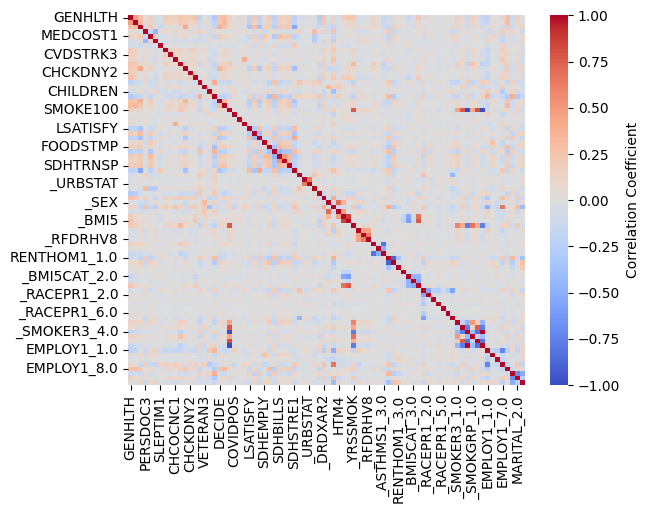

In [16]:
# Correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

In [17]:
# Display Correlation Matrix
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix

,GENHLTH,PHYSHLTH,MENTHLTH,PERSDOC3,MEDCOST1,CHECKUP1,SLEPTIM1,CVDCRHD4,CVDSTRK3,CHCOCNC1,...,_SMOKGRP_3.0,_SMOKGRP_4.0,EMPLOY1_1.0,EMPLOY1_3.0,EMPLOY1_5.0,EMPLOY1_7.0,EMPLOY1_8.0,MARITAL_1.0,MARITAL_2.0,MARITAL_5.0
GENHLTH,1.000000,0.489109,0.269978,0.041305,0.150599,-0.066813,-0.065360,0.202601,0.159033,0.120951,...,0.071754,-0.163116,-0.217816,0.053955,-0.026761,0.086203,0.286249,-0.130394,0.140882,0.008504
PHYSHLTH,0.489109,1.000000,0.299670,0.051546,0.122744,-0.055318,-0.052072,0.148568,0.126540,0.097343,...,0.046215,-0.114392,-0.185505,0.040607,-0.018573,0.040518,0.311844,-0.082615,0.107464,-0.015976
MENTHLTH,0.269978,0.299670,1.000000,-0.044178,0.208675,0.048782,-0.128952,0.017972,0.034784,-0.017693,...,0.046665,-0.087581,-0.003469,0.090267,0.044425,-0.146277,0.192760,-0.126982,0.039767,0.122623
PERSDOC3,0.041305,0.051546,-0.044178,1.000000,-0.155508,-0.448573,0.043349,0.065612,0.044503,0.090276,...,-0.001984,0.001842,-0.125644,-0.069586,-0.040795,0.164872,0.033093,0.071166,0.044072,-0.146603
MEDCOST1,0.150599,0.122744,0.208675,-0.155508,1.000000,0.148691,-0.095062,0.000050,0.013441,-0.038479,...,0.030993,-0.054450,0.044039,0.096288,0.022657,-0.136585,0.085682,-0.076449,0.017252,0.081676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMPLOY1_7.0,0.086203,0.040518,-0.146277,0.164872,-0.136585,-0.175477,0.142908,0.161232,0.101532,0.210164,...,0.064042,-0.076782,-0.735280,-0.130435,-0.173781,1.000000,-0.167124,-0.027036,0.199871,-0.198524
EMPLOY1_8.0,0.286249,0.311844,0.192760,0.033093,0.085682,-0.043617,-0.044331,0.080593,0.114463,0.025293,...,0.022916,-0.105565,-0.252341,-0.044764,-0.059640,-0.167124,1.000000,-0.112668,0.101058,0.031609
MARITAL_1.0,-0.130394,-0.082615,-0.126982,0.071166,-0.076449,-0.038157,0.025901,-0.011579,-0.048656,0.002026,...,-0.018416,0.061579,0.105877,-0.075344,-0.004485,-0.027036,-0.112668,1.000000,-0.688583,-0.525095
MARITAL_2.0,0.140882,0.107464,0.039767,0.044072,0.017252,-0.052904,0.001688,0.069290,0.089384,0.077462,...,0.056751,-0.128904,-0.197199,0.002249,-0.079449,0.199871,0.101058,-0.688583,1.000000,-0.255569


In [18]:
X[['SMOKE100', '_YRSSMOK', '_SMOKER3_3.0', '_SMOKGRP_3.0', '_SMOKGRP_4.0']].corr()

,SMOKE100,_YRSSMOK,_SMOKER3_3.0,_SMOKGRP_3.0,_SMOKGRP_4.0
SMOKE100,1.000000,0.766637,0.767371,0.812741,-1.000000
_YRSSMOK,0.766637,1.000000,0.411332,0.395211,-0.766637
_SMOKER3_3.0,0.767371,0.411332,1.000000,0.764793,-0.767371
_SMOKGRP_3.0,0.812741,0.395211,0.764793,1.000000,-0.812741
_SMOKGRP_4.0,-1.000000,-0.766637,-0.767371,-0.812741,1.000000


In [19]:
# Multicollinearity check
columns_to_drop=['SMOKE100', '_YRSSMOK', 'RENTHOM1_2.0', '_ASTHMS1_1.0', '_BMI5CAT_4.0', '_RACEPR1_1.0', 'MARITAL_1.0','_SMOKGRP_4.0', '_SMOKER3_1.0', '_SMOKER3_3.0', '_SMOKER3_4.0', 'EMPLOY1_1.0']

X_VIF = X.drop(columns=columns_to_drop)
vif_data = pd.DataFrame()
vif_data["feature"] = X_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(vif_data) 

        feature        VIF
0       GENHLTH  12.041607
1      PHYSHLTH   1.886737
2      MENTHLTH   2.220449
3      PERSDOC3  12.092433
4      MEDCOST1   1.381430
..          ...        ...
63  EMPLOY1_5.0   1.207261
64  EMPLOY1_7.0   3.189719
65  EMPLOY1_8.0   1.585662
66  MARITAL_2.0   1.799030
67  MARITAL_5.0   1.854878

[68 rows x 2 columns]


In [20]:
#### Save the final dataset to be used for modeling
BRFSS2022_modeling_data=BRFSS2022_nona_encoded.drop(columns=columns_to_drop)
BRFSS2022_modeling_data['CVDINFR4']=convert_to_binary(BRFSS2022_modeling_data, 'CVDINFR4', value_1=1, value_0=2)
BRFSS2022_modeling_data.to_pickle('../data/BRFSS2022_modeling_data.pkl')

Error!!! Unknown value 0.0 found for feature CVDINFR4.
Please check the data. Exiting the function without making any change!!!
